<a href="https://colab.research.google.com/github/ndb796/Python-Data-Analysis-and-Image-Processing-Tutorial/blob/master/14.%20OpenCV%20Contours%20%EC%B2%98%EB%A6%AC/OpenCV%20Contours%20%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## OpenCV Contours 처리
[강의 노트](https://github.com/ndb796/Python-Data-Analysis-and-Image-Processing-Tutorial/blob/master/14.%20OpenCV%20Contours%20%EC%B2%98%EB%A6%AC/Python%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%EA%B3%BC%20%EC%9D%B4%EB%AF%B8%EC%A7%80%20%EC%B2%98%EB%A6%AC%20-%20OpenCV%20Contours%20%EC%B2%98%EB%A6%AC.pdf)

In [3]:
from google.colab import files
uploaded = files.upload()

Saving digit_image.png to digit_image.png


cv2.boundingRect(contour): Contour를 포함하는 사각형을 그립니다.

- 사각형의 X, Y 좌표와 너비, 높이를 반환합니다.

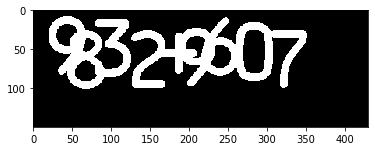

In [46]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('digit_image.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 230, 255, 0)
thresh = cv2.bitwise_not(thresh)

plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))
plt.show()

contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[1]
image = cv2.drawContours(image, contours, -1, (0, 0, 255), 4)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

contour = contours[0]
x, y, w, h = cv2.boundingRect(contour)
image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 3)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

cv2.convexHull(contour): Convex Hull 알고리즘으로 외곽을 구하는 함수

- 대략적인 형태의 Contour 외곽을 빠르게 구할 수 있습니다. (단일 Contour 반환)

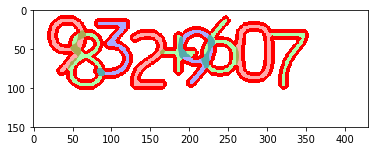

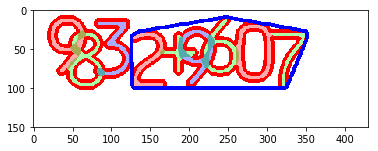

In [17]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('digit_image.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 230, 255, 0)
thresh = cv2.bitwise_not(thresh)

contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[1]
image = cv2.drawContours(image, contours, -1, (0, 0, 255), 4)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

contour = contours[0]
hull = cv2.convexHull(contour)
image = cv2.drawContours(image, [hull], -1, (255, 0, 0), 4)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

cv2.approxPolyDP(curve, epsilon, closed): 근사치 Contour를 구합니다.

- curve: Contour
- epsilon: 최대 거리 (클수록 Point 개수 감소)
- closed: 폐곡선 여부

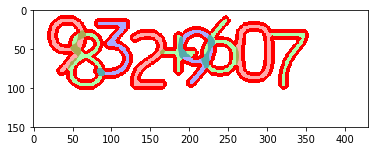

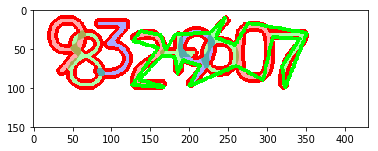

In [15]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('digit_image.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 230, 255, 0)
thresh = cv2.bitwise_not(thresh)

contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[1]
image = cv2.drawContours(image, contours, -1, (0, 0, 255), 4)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

contour = contours[0]
epsilon = 0.01 * cv2.arcLength(contour, True)
approx = cv2.approxPolyDP(contour, epsilon, True)
image = cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

cv2.contourArea(contour): Contour의 면적을 구합니다.

cv2.arcLength(contour): Contour의 둘레를 구합니다.

cv2.moments(contour): Contour의 특징을 추출합니다.

9637.5
1112.1046812534332
{'m00': 9637.5, 'm10': 2328654.1666666665, 'm01': 525860.6666666666, 'm20': 592439950.25, 'm11': 125395340.54166666, 'm02': 32616659.75, 'm30': 157199366984.05002, 'm21': 31597487112.5, 'm12': 7677332730.433333, 'm03': 2223038890.5, 'mu20': 29780523.227014065, 'mu11': -1665373.5978347063, 'mu02': 3923591.96819859, 'mu30': -339915780.7390442, 'mu21': 76375946.41720533, 'mu12': -21905836.49518633, 'mu03': 15169233.760740757, 'nu20': 0.3206295471760697, 'nu11': -0.01793010748946005, 'nu02': 0.04224302932750429, 'nu30': -0.03727866486560947, 'nu21': 0.008376172780476334, 'nu12': -0.0024024196097321344, 'nu03': 0.001663614382378067}


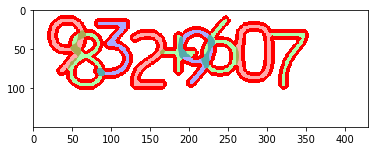

In [1]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('digit_image.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 230, 255, 0)
thresh = cv2.bitwise_not(thresh)

contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[1]
image = cv2.drawContours(image, contours, -1, (0, 0, 255), 4)

contour = contours[0]
area = cv2.contourArea(contour)
print(area)

length = cv2.arcLength(contour, True)
print(length)

M = cv2.moments(contour)
print(M)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

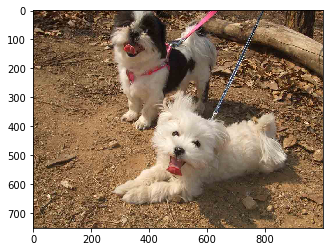

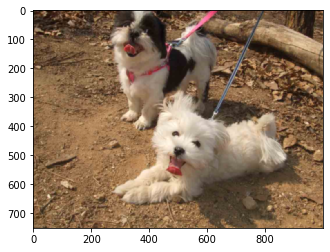

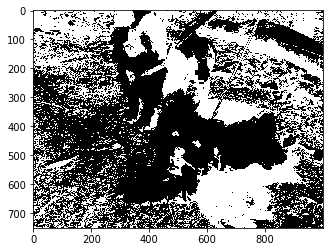

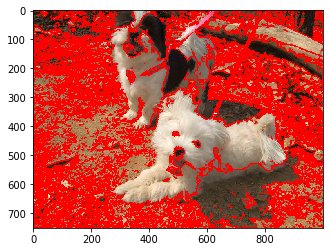

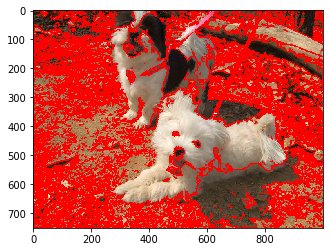

In [43]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('99.jpg')



image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 100, 255, cv2.THRESH_BINARY)
thresh = cv2.bitwise_not(thresh)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# kernel_size: 홀수
dst = cv2.GaussianBlur(image, (9, 9), 0)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()


plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))
plt.show()

contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[1]
image = cv2.drawContours(image, contours, -1, (0, 0, 255), 4)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

contour = contours[0]
x, y, w, h = cv2.boundingRect(contour)
image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 3)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

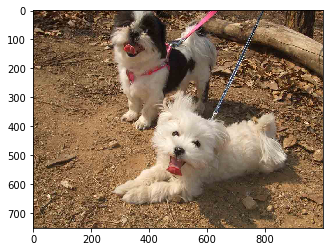

In [44]:
image = cv2.imread('99.jpg')

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 100, 255, cv2.THRESH_BINARY)
thresh = cv2.bitwise_not(thresh)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [32]:
len(contours)

6692

In [33]:
contours

[array([[[820, 749]],
 
        [[823, 749]]], dtype=int32),
 array([[[788, 749]]], dtype=int32),
 array([[[691, 749]],
 
        [[692, 749]]], dtype=int32),
 array([[[581, 749]],
 
        [[584, 749]]], dtype=int32),
 array([[[557, 749]],
 
        [[558, 749]]], dtype=int32),
 array([[[522, 749]]], dtype=int32),
 array([[[431, 749]]], dtype=int32),
 array([[[257, 749]],
 
        [[258, 749]]], dtype=int32),
 array([[[883, 748]],
 
        [[883, 749]],
 
        [[885, 749]],
 
        [[884, 748]]], dtype=int32),
 array([[[864, 748]],
 
        [[864, 749]]], dtype=int32),
 array([[[792, 748]],
 
        [[792, 749]],
 
        [[794, 749]],
 
        [[793, 748]]], dtype=int32),
 array([[[375, 748]],
 
        [[375, 749]],
 
        [[376, 749]]], dtype=int32),
 array([[[308, 748]],
 
        [[308, 749]],
 
        [[311, 749]],
 
        [[311, 748]]], dtype=int32),
 array([[[282, 748]],
 
        [[282, 749]],
 
        [[283, 749]],
 
        [[283, 748]]], dtype=int32),
 a

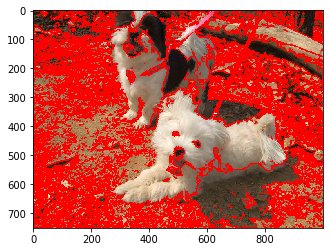

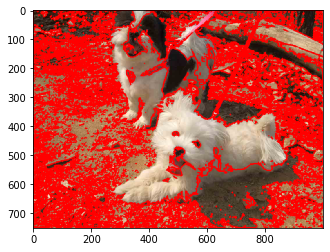